<a href="https://colab.research.google.com/github/reban87/ML-Projects/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Regression with Neural Network in Tensorflow

There are many defination for a regression problem but in our case, we are going to simplify it:predicting a numerical variable based
on some other combinations of variables, even shorter.. predicting a number.

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.1


### Creating data to view and Fit

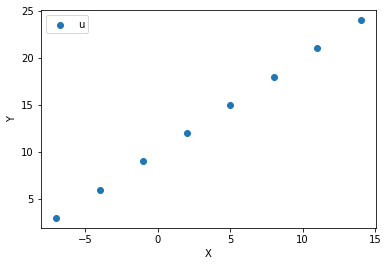

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create  features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create lebels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend('upper right')

In [ ]:
y== X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
#Create a demo tensor for housing price prediction problem.
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])#price of house from the slide
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape

((8,), (8,))

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
X[0].ndim

0

In [ ]:
#Turn our NumPy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

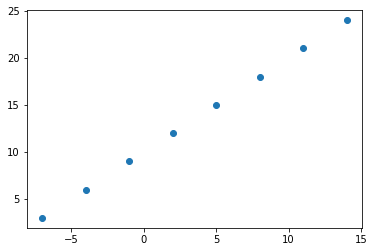

In [ ]:
plt.scatter(X,y)

### Steps in modeling with Tensorflow
1. Creating a model- define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrices ( what we can use to interpret the performance of our model)
3. Fitting the model- letting a model try to find patterns between X and y.

In [ ]:
# set a random seed
tf.random.set_seed(42)

#1. Creating a model using the Sequential API
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1) #kati wota hidden layer rakhne vanne kura dense le vancha
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short form of mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # SGD is short for Schocastic  gradient descent
             metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 523ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred # we were expecting to get the values to be 27 but it is showing around 12....

array([[12.716021]], dtype=float32)

In [ ]:
y_pred+11

array([[23.71602]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** -Here we might add more layers, increase the number of hidden units ( all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling model** - Here we might change the optimization function of perhaps the **learning rate**  of the optimization function.

3. **Fitting a model** -here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model
#1. Create the model
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (This time we will traing longer)
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4411 - mae: 10.4411
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.3086 - mae: 10.3086
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1761 - mae: 10.1761
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0436 - mae: 10.0436
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9111 - mae: 9.9111
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7786 - mae: 9.7786
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.6461 - mae: 9.6461
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5136 - mae: 9.5136
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 9.3811 - mae: 9.3811
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [ ]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model prediction has improved...
model.predict([17.0])

array([[28.559576]], dtype=float32)

In [ ]:
# Let;s again improve our model by updating some hyper parameters in the model

# 1. Create a model
model=tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1)                     
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3. run the model
model.fit(X,y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 538ms/step - loss: 13.3155 - mae: 13.3155
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5805 - mae: 11.5805
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2449 - mae: 10.2449
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.9818 - mae: 10.9818
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4176 - mae: 9.4176
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0347 - mae: 7.0347
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 7.8120 - mae: 7.8120
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6566 - mae: 7.6566
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 5.8639 - mae: 5.8639
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5575 - mae: 7.5575
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - l

In [ ]:
model.predict([17.0])

array([[28.12068]], dtype=float32)

In [ ]:
#create a model to improve the accuracy

#1. Create a model
model=tf.keras.Sequential([
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(1)                            
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3. Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 519ms/step - loss: 13.2765 - mae: 13.2765
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7183 - mae: 10.7183
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9477 - mae: 7.9477
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 3.9929 - mae: 3.9929
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 6.9687 - mae: 6.9687
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7324 - mae: 6.7324
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 4.9316 - mae: 4.9316
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 3.9070 - mae: 3.9070
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 5.2007 - mae: 5.2007
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 5.7855 - mae: 5.7855
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - 

In [ ]:
#predict the model
model.predict([17.0])

array([[28.81386]], dtype=float32)

In [ ]:
# lets practise one more time to build a model

#1. Create a model
model=tf.keras.Sequential([
      tf.keras.layers.Dense(100,activation=None),
      tf.keras.layers.Dense(100,activation=None),
      tf.keras.layers.Dense(100,activation=None),
      tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

#Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 535ms/step - loss: 13.2610 - mae: 13.2610
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2215 - mae: 12.2215
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.1711 - mae: 11.1711
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0918 - mae: 10.0918
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9663 - mae: 8.9663
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 7.7779 - mae: 7.7779
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4538 - mae: 7.4538
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.0386 - mae: 8.0386
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4350 - mae: 8.4350
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 8.3426 - mae: 8.3426
Epoch 11/100
1/1 [==============================] - 0s 7ms/step 

In [ ]:
model.predict([17.0])

array([[28.559576]], dtype=float32)

### Evaluating a model

In practise, a typical workflow you will go through when building a neural network is:
````
build a model -> fit it -> evualte it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

````

When comes to evaluation... there are 3 words you should memorize"
> "Visualize, Visualize, Visualize"

It's a good idea to Visualize:
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The traning of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [ ]:
# Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

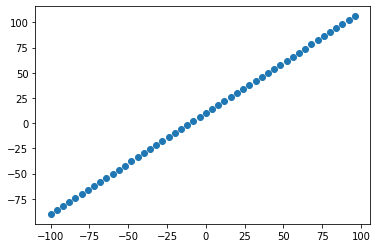

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets... 

* **Training set**- the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set**- this model gets tuned on this data, which is typically 10-15% of the data available
* **Test set**- the model gets evaluated on this data to test what is has learned, this is typically 10-15% of the total data available

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train= X[:40] # first 40 are training samples ( 80% of the data)
y_train= y[:40]

X_test= X[40:] # last 10 are testing samples (20% of the data)
y_test=y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

Now, we've got our data in training and test sets... let's visualize it again!

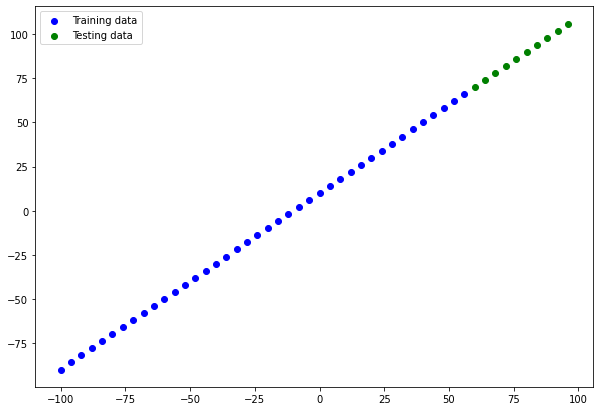

In [ ]:
plt.figure(figsize=(10,7))
#plot training data in blue 
plt.scatter(X_train,y_train,c="b", label="Training data") # our model will learn on this
#plot the test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data") # want our model to be able to predict this (given X, what's y?)
#show a legend
plt.legend()


In [ ]:
# Let's have a look at how to build a model in neural network for our data

#1. Create model
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1)                     
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
#model.fit(X_train,y_train,epochs=100)

### Visualizing the model

In [ ]:
model.summary() #it will cause an error telling us that no model has been built so far, so what can we do??

ValueError: ignored

In [ ]:
X[0],y[0] # input 1 ta variable bata output predict garne dekhiyo, hence we use shape 1 below

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

#1. Create a model (same as above)
model=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=[1],name="input_layers"),
      tf.keras.layers.Dense(1,name="output_layer")
      ],name="model_1")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layers (Dense)         (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params- total numbers of parameters in the model
* Trainable params- these are the parameters (patterns) the model can update as it trains.
* Non-trainable params- these parameters aren't updated during training (this is typical when you bring in already learn patterns or  parameters from other models during **transfer learning**)

**Resource** For more in -depth overview of the trainable parameters within a layer, check  out MIT's introduction to deep learning video.

In [ ]:
# Let's fit the model to our training data
model.fit(X_train, y_train, epochs=100,verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layers (Dense)         (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


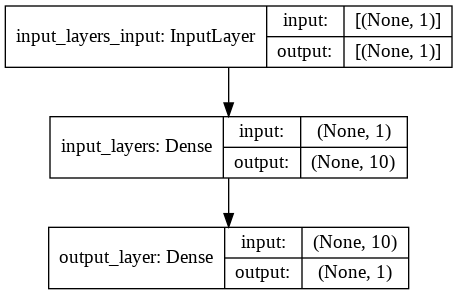

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth vs your model)

In [ ]:
# Make some predictions

y_pred=model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** If you feel like you're going to reuse some kind of functiuonality in the future, it's good idea to turn it into a function

In [ ]:
# Let's create a plotting function

def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10,7))
  #plot the training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training Data")
  #plot the testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing Data")
  #plot the model's prediction in red
  plt.scatter(test_data,predictions,c="r",label="Prediction")

  #plot the legend
  plt.legend();


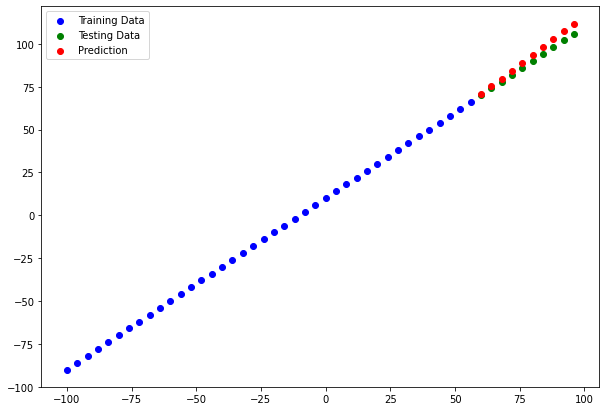

In [ ]:
plot_prediction(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluating our model's predictions with regression evaluation matrix

Depending upon the problems you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"
* **MSE** - mean square error," square the average errors"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 143ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [ ]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the mean square error
mse=tf.metrics.mean_squared_error(y_true=y_test,
                                  y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to imprpove our model

```
Build a model -> fit it -> evaluate it -> tweak a model-> fit it ->evaluate it..
.
````

1. Get more data- get more examples for your model to train on ( more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger(using a more complex model)- this might come in the form of more layers or more hidden units in each layers.
3. Train for longer- give your model more of a chance to find the patterns in the data.

Let's do 3 modellng experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model
model_1=tf.keras.Sequential([
      tf.keras.layers.Dense(1)               
])

#2. Compile a model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD())

#3. Fit a model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5992
Epoch 12/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9324
Epoch 13/100
2/2 [==============================] - 0

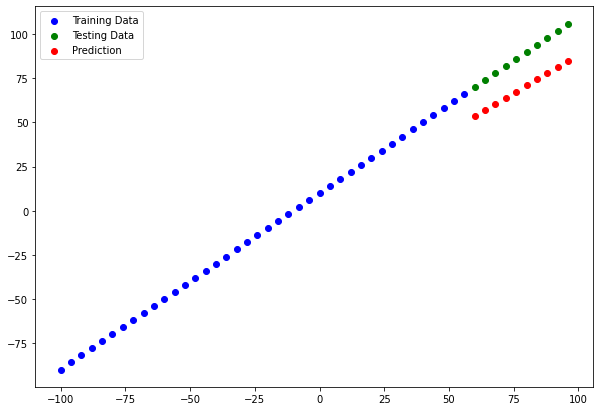

In [ ]:
# Make and plot prediction for model_1
y_preds_1=model_1.predict(X_test)
plot_prediction(predictions=y_preds_1)


In [ ]:
# Calculate model_1 evaluation metrics
mae_1=mae(y_test,(y_preds_1))
mse_1=mse(y_test,(y_preds_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**
* 2 dense layer, trained 100 epopchs

In [ ]:
# Create a random seed
tf.random.set_seed(42)

#1. Create a model_2
model_2=tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)                     
])
#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 26.8627 - mae: 26.8627
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.4175 - mae: 24.4175
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 31.5187 - mae: 31.5187
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8490 - mae: 27.8490
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.6465 - mae: 14.6465
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.9682 - mae: 11.9682
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0874 - mae: 11.0874
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3978 - mae: 11.3978
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 42.4087 - mae: 42.4087
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 28.3537 - mae: 28.3537
Epoch 11/100
2/2 [==============================] - 0s 4ms/

In [ ]:
y_preds_2=model_2.predict(X_test)

In [ ]:
y_preds_2.shape

(10, 1)

In [ ]:
X_test.shape

TensorShape([10])

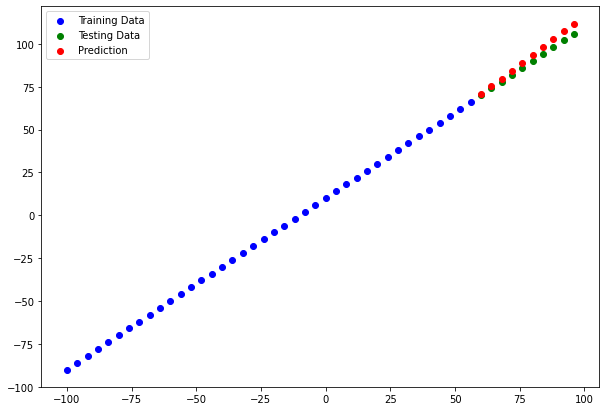

In [ ]:
plot_prediction(predictions=y_preds_2)

In [ ]:
#Calculate model_2 evaluation metrics
mae_2=mae(y_test,y_preds_2)
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
mse_2=mse(y_test,y_preds_2)
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set the random Seed
tf.random.set_seed(42)

# 1. Create a Model_3
model_3=tf.keras.Sequential([
        tf.keras.layers.Dense(10,activation=None),
        tf.keras.layers.Dense(1)                           
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mse"])

#3. Fit the model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 25.4067 - mse: 862.0631
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.9183 - mse: 824.6820
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 24.0963 - mse: 775.8581
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 23.3830 - mse: 728.8749
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 22.9531 - mse: 709.4009
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 22.8289 - mse: 693.5894
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 22.0927 - mse: 643.8502
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 20.8092 - mse: 575.6016
Epoch 9/500
2/2 [==============================] - 0s 16ms/step - loss: 20.1429 - mse: 550.1333
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 20.0316 - mse: 533.6907
Epoch 11/500
2/2 [==============================

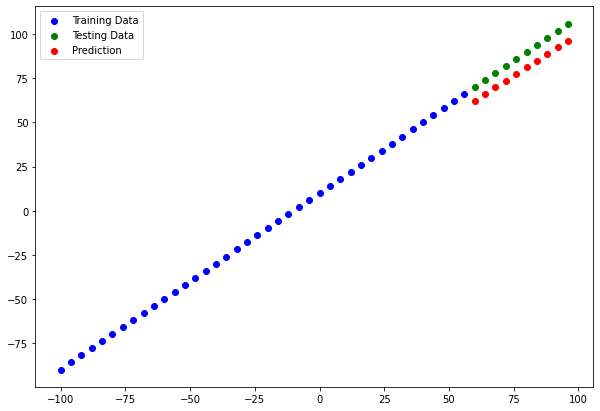

In [ ]:
y_preds_3=model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

In [ ]:
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=8.695226>,
 <tf.Tensor: shape=(), dtype=float32, numpy=76.03696>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale.

### Comparing our experiments.

We've run a few experiments, lets compare the results.


In [ ]:
# Let's compare our model's result using a pandas Dataframe
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results=pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results   


,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,8.695226,76.036957


Looks like `model_3` performed the best....

In [ ]:
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of  your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figure out what does work. Remember the machine learning practioner's motto:"Experiment,experiment and experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you are running lots of experiments.

Luckily, there are tools to help us.

**Resource:** As you build more models, you will want to look into using.

* TensorBoard - a component of the TensorFlow library to help track modeling experiments ( we will see this later on.)
* Weights & Biases- a tool for tracking all of kinds of machine learning experiments ( plugs straight into TensorBoard).

### Saving our models

Savinng our models allows us to use them outside of google Colab ( or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel Format
2. The HDF5 form

In [ ]:
# Save model using SaveModel Format
model_3.save("Best_model_SavedModel_Format")

INFO:tensorflow:Assets written to: Best_model_SavedModel_Format/assets


In [ ]:
# Save model using the HDF5 format
model_3.save("best_model_HDF5_format.h5")

### Loading in a saved model

In [ ]:
# Load in the SaveModel format model
loaded_SavedModel_format=tf.keras.models.load_model("Best_model_SavedModel_Format")
loaded_SavedModel_format.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Load in a model using a .h5 format
loaded_h5_model=tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Download a model ( or any file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code ( see the cell below).
3. Save it to Google drive by connecting Google Drive and Copying it there ( see end cell for detalils)

In [ ]:
#Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save a file from Google Colab to Google Drive (requires mounting Google Drive)
#cp means copy method your model and the destination folder
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow_Tutorials

In [ ]:
#ls means to list out the files that it has inside the folder
!ls /content/drive/MyDrive/TensorFlow_Tutorials

best_model_HDF5_format.h5


### A larger Example



In [ ]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot


In [ ]:
#Read in the insurance dataset from Kaggle: Medical cost dataset -> Goto github, Goto files -> Goto Raw Files ->Copy the link
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
#Let's try one-hot encode out Dataframe so it's all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (Features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]



In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
#Build a neural network (Sort of like model_3 above)

#Create a random seed
tf.random.set_seed(42)

#1. Create a model
insurance_model=tf.keras.Sequential([
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])

#2. Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3. Fit the model
insurance_model.fit(X_train,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 978us/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1918 - mae: 7718.1918
Epoch 3/100
34/34 [==============================] - 0s 988us/step - loss: 6983.7825 - mae: 6983.7825
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8083.4823 - mae: 8083.4823
Epoch 5/100
34/34 [==============================] - 0s 954us/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4114 - mae: 7618.4114
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4982 - mae: 7678.4982
Epoch 8/100
34/34 [==============================] - 0s 998us/step - loss: 7780.4293 - mae: 7780.4293
Epoch 9/100
34/34 [==============================] - 0s 923us/step - loss: 7588.8131 - mae: 7588.8131
Epoch 10/100
34/34 [==============================] - 0s 952us/step - loss: 7520.6834 - 

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3296 - mae: 7023.3296


[7023.32958984375, 7023.32958984375]

In [ ]:
 y_train.median(),y_train.mean()

(9575.4421, 13346.089736364489)

Right now it looks like our model is not performing too well, let's try and improve it.

To(try) improve our model, we will run 2 experiments:
1. Add an extra layer with more hidden units.
2. Train for longer
3. (insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model
insurance_model_2=tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

#2. Compile a model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

#3. Fit a model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan          
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================] - 0s 933us/step - loss: nan - mae: nan
Epoch 7/100
34/34 [==============================] - 0s 996us/step - loss: nan - mae: nan
Epoch 8/100
34/34 [==============================] - 0s 980us/step - loss: nan - mae: nan
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 [==============================] - 0s 942us/step - loss: nan - mae: nan
Epoch 11/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 12/100

In [ ]:
#Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
#the error that occured is due to model problem so, we can update our model testing the different number of hyperparameter..
 # Set random seed
tf.random.set_seed(42)

#1. Create a model
insurance_model_2=tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

#2. Compile a model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit a model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12353.0241 - mae: 12353.0241
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9718.5257 - mae: 9718.5257
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.2963 - mae: 7732.2963
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [ ]:
#Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
#Let's create a model with more optimize parameter
#Create a random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_test=tf.keras.Sequential([
                  tf.keras.layers.Dense(100,activation="relu"),
                  tf.keras.layers.Dense(10,activation="relu"),
                  tf.keras.layers.Dense(1,activation="relu")
                  ])

# 2. Compile the model
insurance_model_test.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_test.fit(X_train,y_train,epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13298.6101 - mae: 13298.6101
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12958.0778 - mae: 12958.0778
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12732.4872 - mae: 12732.4872
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13434.8449 - mae: 13434.8449
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13364.7817 - mae: 13364.7817
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13241.2042 - mae: 13241.2042
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13287.0566 - mae: 13287.0566
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13644.6420 - mae: 13644.6420
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13446.3819 - mae: 13446.3819
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 13627.77

In [ ]:
insurance_model_test.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 12968.3174 - mae: 12968.3174


[12968.3173828125, 12968.3173828125]

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [ ]:
#Let's create a next model with Adam optimizer and epochs=200

#Set a random seed
tf.random.set_seed(42)

#1. Create a model
insurance_model_3=tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
                  ])

#2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#Fit the model
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12353.0241 - mae: 12353.0241
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9718.5257 - mae: 9718.5257
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7732.2963 - mae: 7732.2963
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [ ]:
#Evcaluate our 3rd model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

Text(0, 0.5, 'loss')

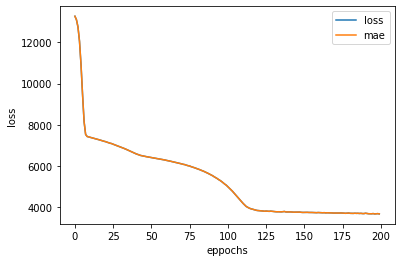

In [ ]:
#Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.xlabel("eppochs")
plt.ylabel("loss")

**Question:** How long should you train for?

It depends on the problem you are working on. Tensorflow has a solution! It's called the EarlyStopping Callback.

### Preprocessing Data (normalization and standardization)

In terms of scaling values, neural network tend to prefer normalization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataframe
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


To prepare our data, we borrow some classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in these column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Creae X & y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

#Build our test and train sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with Normalization ( MinmaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
#What does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Our data hase been normalized and one hot encoded. Now lets build a neural network.

In [ ]:
#Build a neural netowrk to fit our normalized model
tf.random.set_seed(42)

#1. Create a model
insurance_model_4=tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 12304.99

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

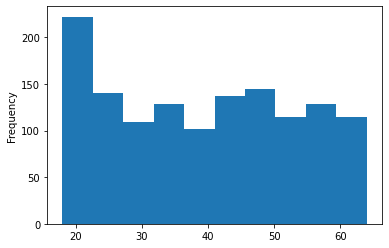

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_female        1338 non-null   uint8  
 4   sex_male          1338 non-null   uint8  
 5   smoker_no         1338 non-null   uint8  
 6   smoker_yes        1338 non-null   uint8  
 7   region_northeast  1338 non-null   uint8  
 8   region_northwest  1338 non-null   uint8  
 9   region_southeast  1338 non-null   uint8  
 10  region_southwest  1338 non-null   uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 41.9 KB


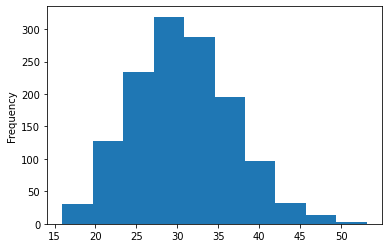

In [ ]:
X["bmi"].plot(kind="hist")